# <center> Predicting Bank Customers To Target 

When promoting term deposits, it's important to identify banking customers that will likely invest, so these customers can be targeted during marketing campaigns.


### Bank Marketing Dataset
- Follow this link to download the data:
https://drive.google.com/uc?export=download&id=1tqPWmOoKq5qhnYshWfhfn4v6o_9Fe8Z1
- Follow this link to understand more about Data: https://www.kaggle.com/competitions/bank-marketing-uci/overview







# Decision Tree Classification - Data Analytics

Importing the dataset file/url

In [2]:
train_url = "https://drive.google.com/uc?export=download&id=1tqPWmOoKq5qhnYshWfhfn4v6o_9Fe8Z1" 

Importing essential libraries for data understanding and Exploratory Data Analysis 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Variables

In [5]:
# importing dataset
train = pd.read_csv(train_url,sep=";")
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# print the columns(feature variables) of the dataset
print(train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. My goal is to predict if the client will subscribe to a term deposit (column/variable y in our data).

In [13]:
# distinguish categorical and numerical columns
# Create variables for categorical columns
categorical = np.argwhere(np.array([type(val) is str for val in train.iloc[0]])).flatten()
print("Categorical Columns:", categorical)

# Create variables for numerical columns
numerical = np.argwhere(np.array([type(val) is not str for val in train.iloc[0]])).flatten()
print("Numerical Columns:", numerical)


Categorical Columns: [ 1  2  3  4  6  7  8 10 15 16]
Numerical Columns: [ 0  5  9 11 12 13 14]


In [19]:
# distinguish categorical and numerical columns
categorical = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
numerical = ["age","balance","day","duration","campaign","pdays","previous"]

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [14]:
# To check the data types of each column
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [16]:
# to check total missing values each column
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It shows that we don't have any missing values in any columns, but train.head() shows, we have missing values labelled as "unknown" in the dataset. We will treat them similar to missing values. Thankfully, we have sufficient data allowing us to drop the rows with missing/unknown values.

In [23]:
# drop such rows that have entry as unknown
for feature in categorical:
    train = train[train[feature]!= "unknown"]
print(len(train))

7842


In [24]:
# I need to replace values(yes or no) in y column(to 0 or 1) before I can analyze the data

train["y"] = train["y"].replace({"no": 0, "yes": 1})

In [29]:
train["y"].head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: y, dtype: int64

## EDA - Univariate Analysis


<Axes: ylabel='count'>

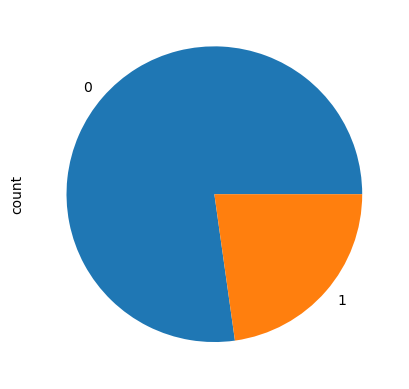

In [31]:
# plot a pie chart to check classes in target column
train['y'].value_counts().plot.pie()

In [32]:
# To check counts of categories in Job column
train['job'].value_counts()

job
management       1753
blue-collar      1537
technician       1289
admin.           1057
services          682
retired           458
self-employed     264
student           237
entrepreneur      211
unemployed        208
housemaid         146
Name: count, dtype: int64

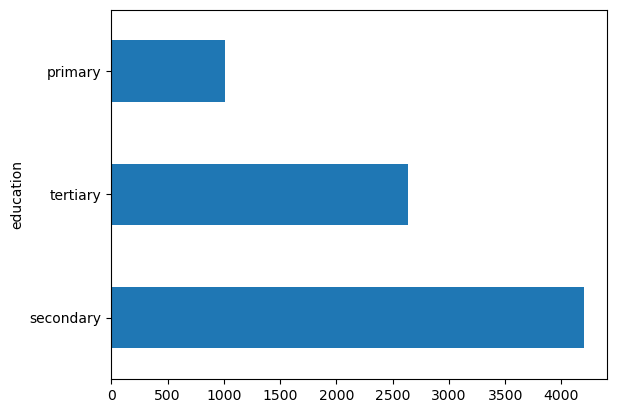

In [35]:
# plot the bar graph for count of categories in Education column 
train['education'].value_counts().plot.barh()
plt.show()

In [38]:
# If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. Check using Balance column
train['balance'].describe()

count     7842.000000
mean      1552.343280
std       3084.580003
min      -1884.000000
25%        162.000000
50%        595.000000
75%       1733.750000
max      81204.000000
Name: balance, dtype: float64

## EDA - Bivariate Analysis


In [41]:
# Check the count distribution of target_variables accross poutcome
train.groupby(['poutcome'])['y'].value_counts().unstack()

y,0,1
poutcome,,
failure,4095,584
other,1462,288
success,499,914


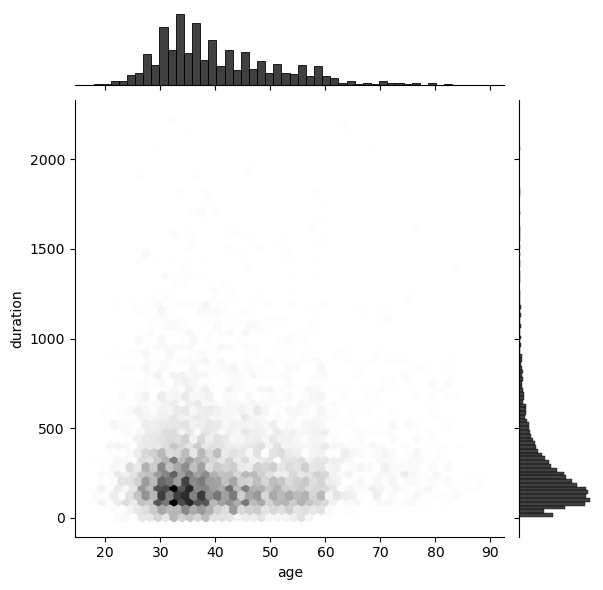

In [44]:
# joint plot of age and duration
sns.jointplot(x='age', y='duration', data=train, kind='hex', color='k')
plt.show()

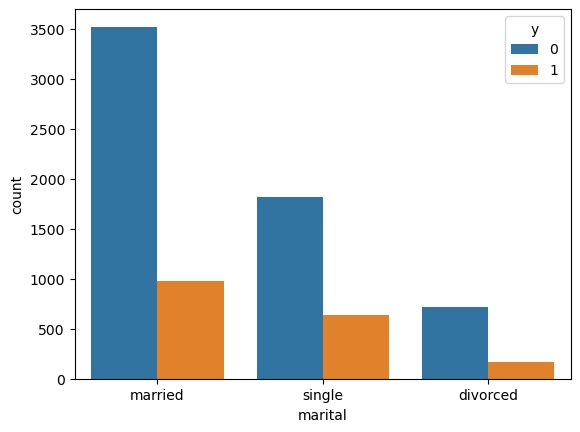

In [46]:
# show countplot for marital status column with respect to target variable categories
sns.countplot(x=train['marital'],hue=train['y'], data=train)
# hue means a color or a shade so, here, hue="column name" means provide datapoints with different color for different classes of "column name"
plt.show()

A boxplot displays the distribution of data based on a five number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum

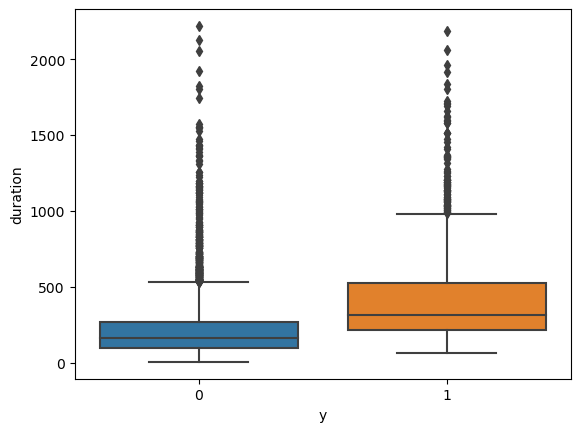

In [47]:
# create a box plot for call duration vs target_variable
sns.boxplot(y=train['duration'],x=train['y'])
plt.show()

Successful marketing have a higher median and quartile ranges of the duration of call. 

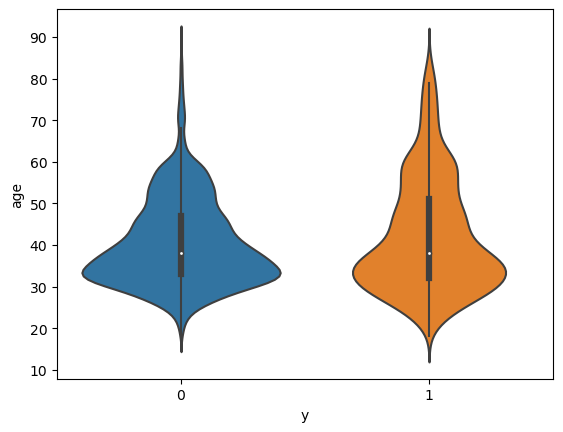

In [48]:
# create a violin plot for AGE vs target variable
sns.violinplot(x=train['y'], y=train['age'], data=train)
plt.show()

more middle age(25-50) people tend to show lack of interest

## EDA - Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

job          admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                               
primary    0.131579     0.083779      0.045455   0.240741    0.190476   
secondary  0.222607     0.125133      0.178571   0.175439    0.163934   
tertiary   0.276316     0.242424      0.085714   0.257143    0.297775   

job         retired  self-employed  services   student  technician  unemployed  
education                                                                       
primary    0.422360       0.066667  0.150943  0.411765    0.178571    0.428571  
secondary  0.408654       0.132530  0.160202  0.449367    0.183651    0.359375  
tertiary   0.438202       0.313253  0.222222  0.419355    0.277174    0.440678  


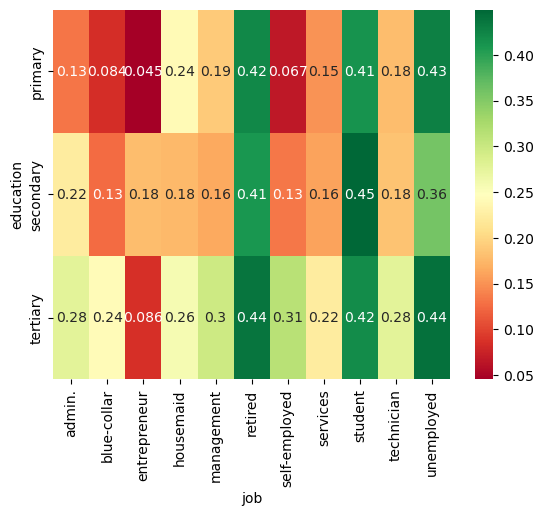

In [50]:
# create pivot table of education vs job vs target_variable
result = pd.pivot_table(data=train, index='education', columns='job', values='y')
print(result)
# create heat map for the same
sns.heatmap(result, annot=True, cmap = 'RdYlGn')
plt.show()

The above heatmaps sums up everything:
- Bank marketing campaign are more successful among Students, unemployed and Retired.
- For other Job categories, we see that primary education people show much low interest or success rates. As the education increase among people, the success rate gets high.

/Users/brockjohnson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


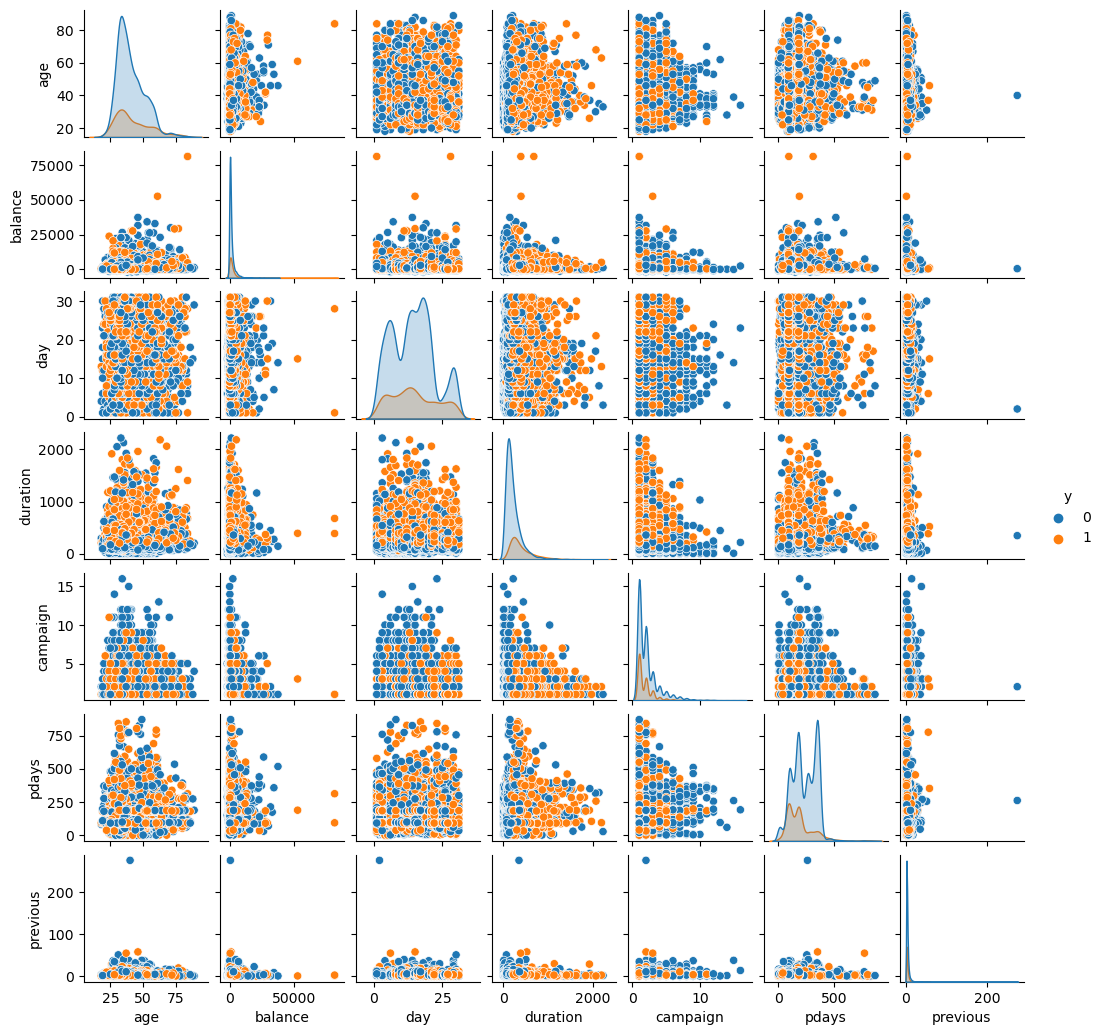

In [51]:
# create a pairplot with the target variable as a class for segmentation
sns.pairplot(hue='y', height=1.5, data=train)
plt.show()

## Data Preprocessing

### Encoding Categories
Encoding categorical variables to convert to numerical values. 

In [64]:
# create dummies for categorical variables for train and test data
train_dummies = pd.get_dummies(train[categorical], prefix = categorical, drop_first = True)
# ensure dummies are numerical values
train_dummies = train_dummies.astype(int)
# concat the created dummies and drop those categorical columns
encoded_train = pd.concat([train,train_dummies], axis=1)
encoded_train.drop(categorical,axis=1,inplace=True)
encoded_train.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
24060,33,882,21,39,1,151,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24062,42,-247,21,519,1,166,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
24064,33,3444,21,144,1,91,4,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24072,36,2415,22,73,1,86,4,0,0,0,...,0,0,0,0,0,0,1,0,1,0
24077,36,0,23,140,1,143,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
# Creating X and Y
y = encoded_train['y']
X = encoded_train.drop(['y'],axis=1)
X.head(), y.head()

(       age  balance  day  duration  campaign  pdays  previous  \
 24060   33      882   21        39         1    151         3   
 24062   42     -247   21       519         1    166         1   
 24064   33     3444   21       144         1     91         4   
 24072   36     2415   22        73         1     86         4   
 24077   36        0   23       140         1    143         3   
 
        job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jan  \
 24060                0                 0              0  ...          0   
 24062                0                 0              0  ...          0   
 24064                0                 0              0  ...          0   
 24072                0                 0              0  ...          0   
 24077                0                 0              0  ...          0   
 
        month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
 24060          0          0          0          0          0       

In [67]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2) 

# Decision Tree Classification - Baseline Model Fitting

In [68]:
# Initializing the Model 
Classification_Tree = DecisionTreeClassifier()

In [69]:
# Fitting the training data
Classification_Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
# Generating Predictions
y_test_predictions = Classification_Tree.predict(X_test)
y_test_predictions

array([0, 1, 0, ..., 0, 0, 0])

### Intepreting results - Analyzing training and testing errors

In [71]:
# To check Classification model training accuracy using sklearn
from sklearn.metrics import accuracy_score
accuracy_score(Classification_Tree.predict(X_train),y_train)

1.0

In [72]:
# Check accuracy on test data
accuracy_score(Classification_Tree.predict(X_test),y_test)

0.7965323814380418

### Plot Classification Tree – A visual representation of the Decision Tree's inner workings 

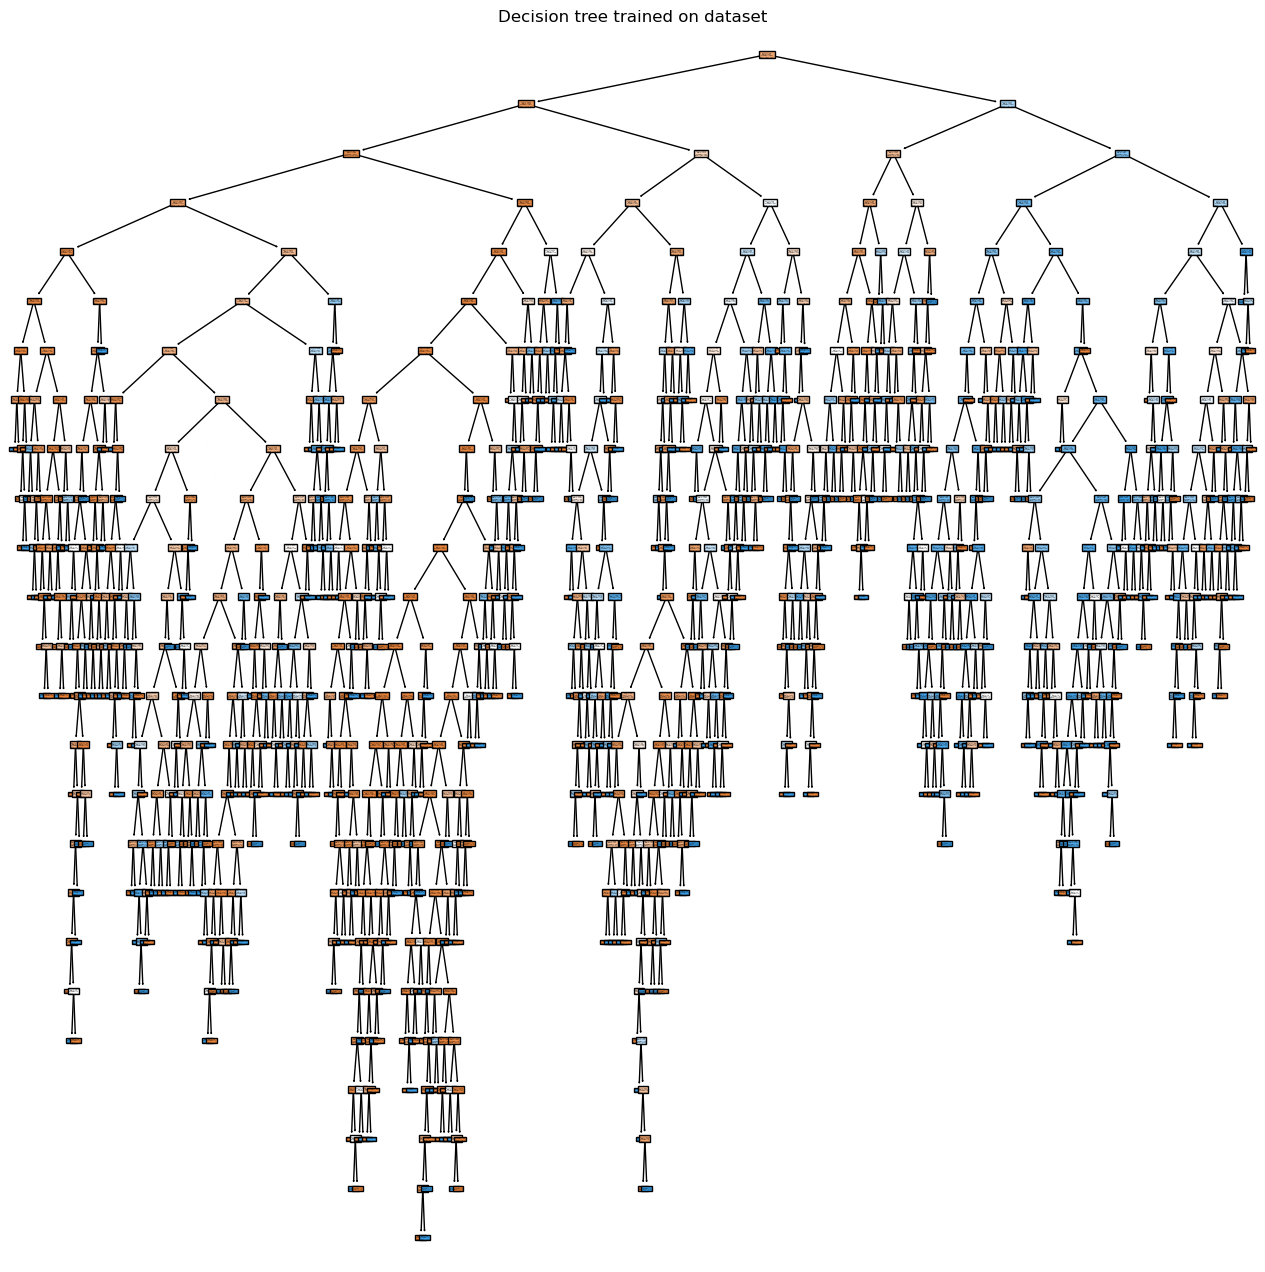

In [73]:
# use sklearn to plot tree
from sklearn.tree import plot_tree
fig = plt.figure()
fig.set_size_inches(16,16)
plot_tree(Classification_Tree, filled=True)
plt.title("Decision tree trained on dataset")
plt.show()

## Hyperparameter Tuning - Hyperopt
Example of hyperparameters in the Decision Tree algorithm is the Minimum number of samples a node must possess before splitting(min_samples_split), maximum depth(max_depth), and criterion. These parameters are tunable and can directly affect how well model trains.

Then we use hyperparameter optimization–a process of finding the right combination of hyperparameter values in order to achieve maximum accuracy from the model.

**Hyperopt** is a Hyperparameter optimization library that uses Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model. 

In [75]:
!pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 422.9 kB/s eta 0:00:00a 0:00:01


In [76]:
# importing library for hyperparameter tuning 
import hyperopt 
from hyperopt.pyll.base import scope

### Search Space
The space of all feasible solutions (the set of solutions among which the desired solution resides) is called search space. Each point in the search space represents one possible solution. Hyperopt has different functions to specify ranges for input parameters. They're stochastic search spaces. 

The most common options for a search space to choose are :

- hp.choice(label, options) — This can be used for categorical parameters, it returns one of the options, which should be a list or tuple.Example: hp.choice(“criterion”, [“gini”,”entropy”,])
- hp.uniform(label, low, high) — It returns a value uniformly between low and highExample: hp.uniform(“max_leaf_nodes”,1,10)
- hp.normal(label, mu, sigma) — This returns a real value that’s normally-distributed with mean mu and standard deviation sigma
- hp.qnormal(label, mu, sigma, q) — This returns a value like round(normal(mu, sigma) / q) * q
- hp. quniform(label, low, high, q) Returns a value like round(uniform(low, high) / q) * q. Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.


In [78]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
# Define Parameter Space for Optimization
space = {
    "max_depth": hp.choice("max_depth", [i for i in range(1,31)]),    
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In our case, we are looking for two parameters: criterion and max_depth. so we have two options for criterion, i.e gini and entropy. And we will be looking at value of max_depth from 1 to 30. 

### KFold Validation
K-Folds cross-validator provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

It ensures every observation from the original dataset has the chance of appearing in training and test set. This is an excellent approach, but can be cpmputationally intensive when using large datasets.

In [80]:
# import KFold from sklearn model selection and prepare a function for hyperparameter tuning for our hyperopt search space
from sklearn.model_selection import KFold

def hyperparameter_tuning(params):
    clf = DecisionTreeClassifier(**params)
    k = 5
    kf = KFold(n_splits=k, random_state=None)
    acc_score = []
    for train_index , test_index in kf.split(X_train):
      X_train_kf , X_test_kf = X_train.iloc[train_index],X_train.iloc[test_index]
      y_train_kf , y_test_kf = y_train.iloc[train_index] ,y_train.iloc[test_index]
      clf.fit(X_train_kf,y_train_kf)
      pred_values = clf.predict(X_test_kf)
      acc = accuracy_score(pred_values, y_test_kf)
      acc_score.append(acc)
    avg_acc_score = sum(acc_score)/k
    return {"loss": -avg_acc_score, "status": STATUS_OK}

fmin chooses the minimum of the losses that's why negative sign is used for finding maximum accuracy.

### Fit the Optimizer

In [81]:
# Initialize trials object for fitting the optimizer
trials = Trials()

best = fmin(
    fn = hyperparameter_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals=100,
    trials = trials
)

print("Best: {}".format(best))

100%|██████| 100/100 [00:14<00:00,  6.80trial/s, best loss: -0.8408423352348586]
Best: {'criterion': 1, 'max_depth': 1}


## Comparing Baseline and Tuned Model

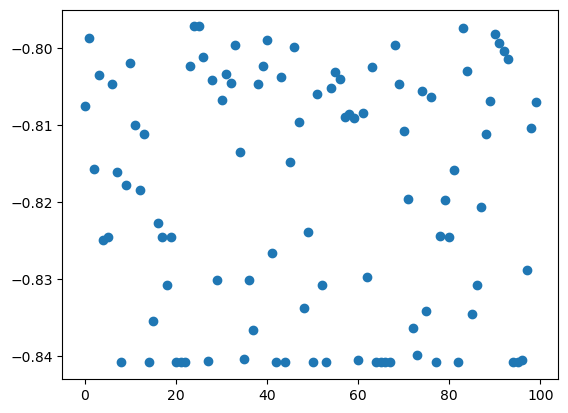

In [86]:
# plot to check accuracies given in the trials
plt.scatter([i for  i in range(len(trials.losses()))],trials.losses())

### training the tuned model
We can say that entropy(index 1 of criterion) and max_depth = 2(index 1 of our choice max_depth) gives the highest accuracy among all after applying KFold cross validation on our training dataset which is why our these features are best predictors for any new data, e.g. test data.

In [87]:
# build new model for chosen parameters
clf = DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

### Analyzing train and test metrics

In [88]:
# train accuracy
accuracy_score(clf.predict(X_train),y_train)

0.8413535113076007

In [90]:
# test accuracy
accuracy_score(clf.predict(X_test),y_test)

0.8403875573686894

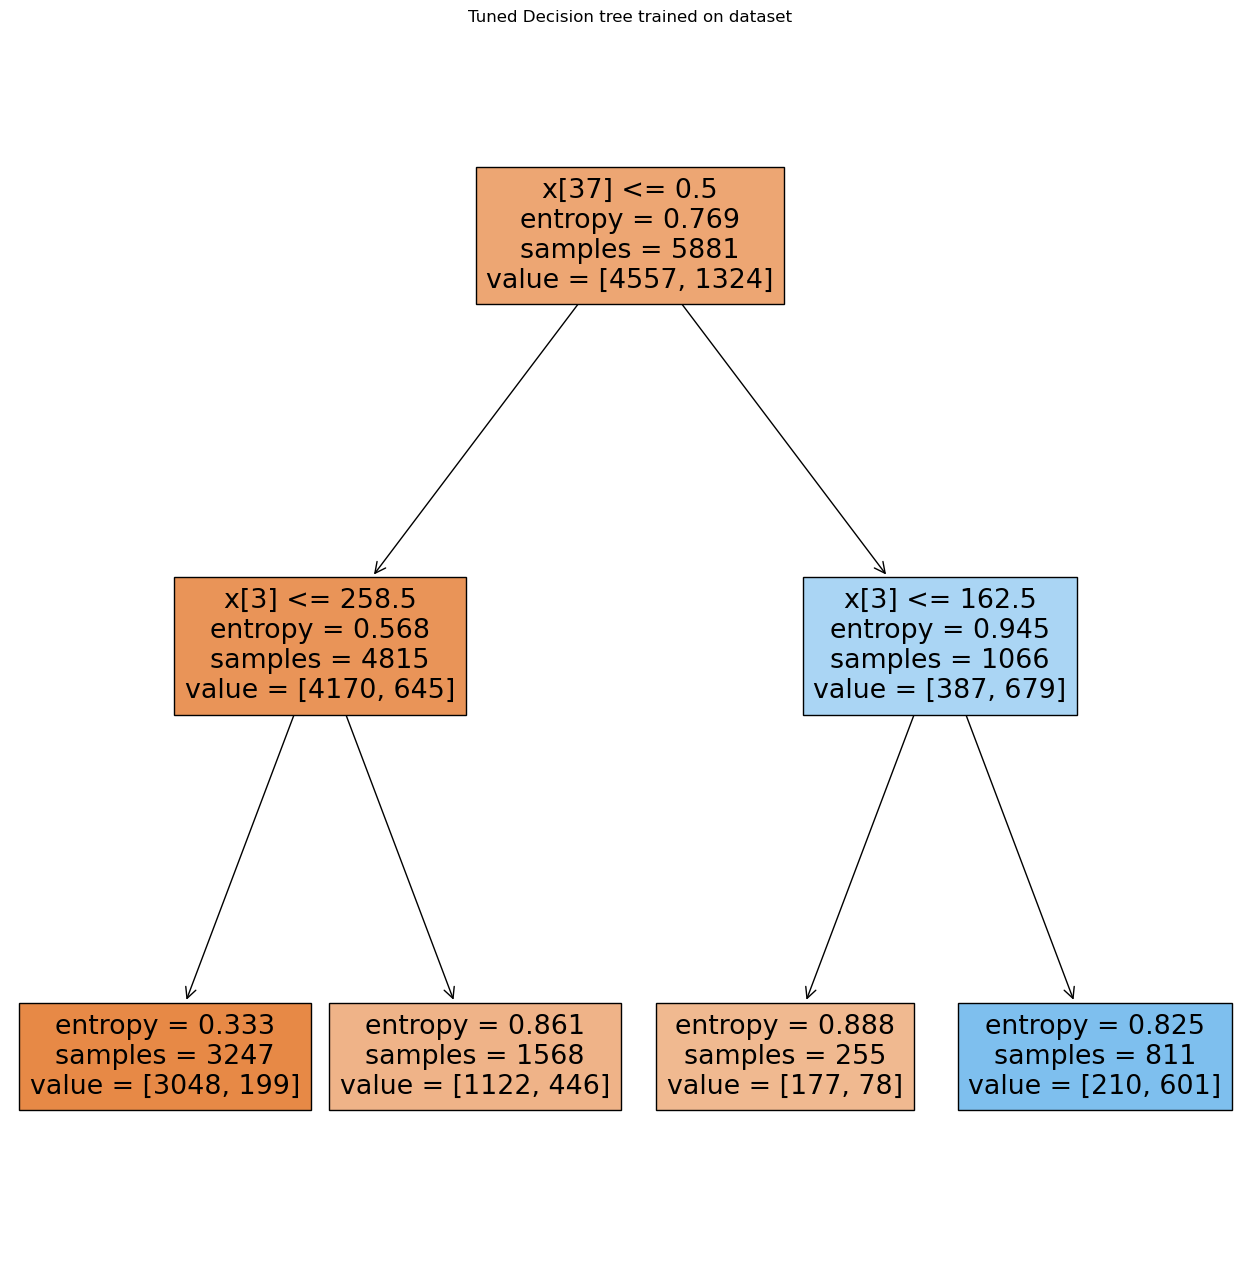

In [91]:
# plot the tuned clf classifier tree 
fig = plt.figure()
fig.set_size_inches(16,16)
plot_tree(clf, filled=True)
plt.title("Tuned Decision tree trained on dataset")
plt.show()

### Comparison
We used KFold validation method on our training dataset to choose the best parameters among the choice so that we can better performance over our test data. With baseline model we obtained 79% accuracy over test data while we obtained above 84% accuracy after hyperparameter tuning. We potentially avoided overfitting of the training set. Also, we calculated the best parameters for our model. This allowsus to achieve maximum accuracy when running test data through our model.

Also, when comparing tree graphs before and after hyperparameter tuning, the latter graph appears more generalised and less complex.